In [ ]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
# Function to fetch historical stock data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data


In [ ]:
# Function to preprocess data and create input sequences for CNN
def create_input_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)



In [ ]:
# Function to build and train CNN model
def build_cnn_model(sequence_length):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu',
               input_shape=(sequence_length, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model



In [ ]:
# Function to predict future stock prices
def predict_future_prices(model, input_sequence):
    predicted_price = model.predict(input_sequence.reshape(1, input_sequence.shape[1], input_sequence.shape[0]))
    return predicted_price[0][0]



In [ ]:
# Plot the closing prices
def plot_stock_data(stock_data):
  plt.figure(figsize=(10, 6))
  plt.plot(stock_data['Close'], label='Close Price', color='blue')
  plt.title('Historical Stock Prices')
  plt.xlabel('Date')
  plt.ylabel('Price (INR)')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
# Function to find the best stock to buy today
def find_best_stock(symbol, start_date, end_date, sequence_length):
    # Fetch historical stock data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    plot_stock_data(stock_data)
    # Preprocess data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(stock_data[['Close']])
    # Create input sequences and targets for CNN model
    X, y = create_input_sequences(scaled_data, sequence_length)
    # Reshape input data to match the expected input shape of the CNN model
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # <-- Corrected reshaping
    # Build and train CNN model
    model = build_cnn_model(sequence_length)
    model.fit(X, y, epochs=10, batch_size=32)

    # Use the trained model to predict future prices for the latest data point
    latest_data = scaled_data[-sequence_length:]
    latest_data = np.reshape(latest_data, (1, sequence_length, 1))  # <-- Corrected reshaping
    predicted_price = predict_future_prices(model, latest_data)

    # Reverse the scaling to get the actual predicted price
    predicted_price = scaler.inverse_transform([[predicted_price]])[0][0]

    return predicted_price




[*********************100%%**********************]  1 of 1 completed


Stock Data:-                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-02  393.000000  393.899994  390.500000  393.049988  391.249847   
2023-01-03  393.049988  397.750000  391.700012  397.049988  395.231537   
2023-01-04  397.500000  397.500000  388.600006  389.700012  387.915222   
2023-01-05  390.000000  392.200012  383.750000  386.899994  385.128021   
2023-01-06  387.000000  388.799988  381.399994  382.000000  380.250458   
...                ...         ...         ...         ...         ...   
2024-02-23  535.000000  541.250000  533.299988  536.150024  536.150024   
2024-02-26  536.250000  536.500000  526.049988  532.900024  532.900024   
2024-02-27  534.000000  537.400024  527.549988  531.450012  531.450012   
2024-02-28  530.000000  530.950012  515.000000  517.700012  517.700012   
2024-02-29  517.299988  524.250000  513.200012  518.599976  518.599976   

             Volume  
Da

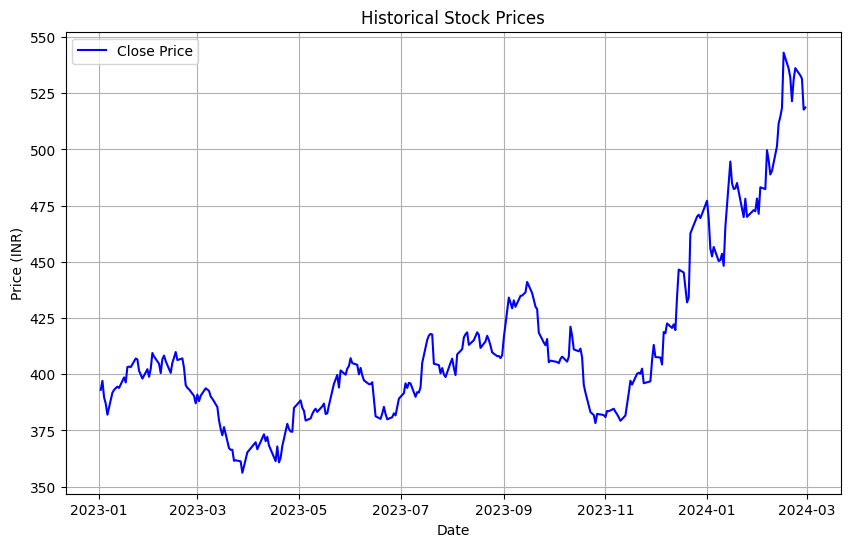

scaled_data [[0.19726969]
 [0.21868297]
 [0.1793362 ]
 [0.16434681]
 [0.13811558]
 [0.19057804]
 [0.19726969]
 [0.20155244]
 [0.20503207]
 [0.20182004]
 [0.22698071]
 [0.21493574]
 [0.25160601]
 [0.25267658]
 [0.25133825]
 [0.27194856]
 [0.26980727]
 [0.2427729 ]
 [0.22403629]
 [0.24652029]
 [0.22831904]
 [0.24732326]
 [0.28506426]
 [0.27676652]
 [0.25936823]
 [0.23715198]
 [0.27061023]
 [0.27890781]
 [0.26552451]
 [0.23768735]
 [0.26177729]
 [0.27408986]
 [0.28747315]
 [0.26820117]
 [0.27221616]
 [0.24919695]
 [0.20851169]
 [0.20208781]
 [0.19860802]
 [0.18281583]
 [0.16514977]
 [0.18602785]
 [0.17050309]
 [0.18335119]
 [0.20101708]
 [0.19486079]
 [0.1814775 ]
 [0.17612418]
 [0.15658459]
 [0.12446468]
 [0.10465733]
 [0.08913274]
 [0.10867232]
 [0.05861875]
 [0.05460376]
 [0.05460376]
 [0.02837253]
 [0.02971086]
 [0.0270342 ]
 [0.        ]
 [0.01525683]
 [0.04844748]
 [0.0629015 ]
 [0.07253741]
 [0.05594209]
 [0.09154163]
 [0.07521407]
 [0.08538535]
 [0.06477503]
 [0.02756956]
 [0.0626

Shape of latest_data (1, 60, 1)
Shape here--------- (1, 60, 1)
Data to be passed in predict function (1, 60, 1)
1/1 [==============================] - 0s 49ms/step
The predicted price for WIPRO.NS tomorrow is 534.03


In [ ]:
# Example usage
symbol = 'WIPRO.NS'  # Example stock symbol (Apple Inc.)
start_date = '2023-01-01'
end_date = '2024-03-01'
sequence_length = 60  # Length of input sequence for CNN model

predicted_price = find_best_stock(symbol, start_date, end_date, sequence_length)
print(f"The predicted price for {symbol} tomorrow is {predicted_price:.2f}")
